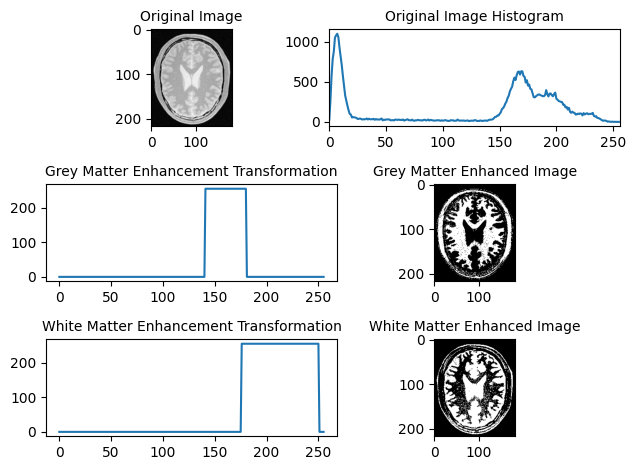

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the original image (replace with your image path)
img_orig = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)

# Create histogram of the original image
hist_orig = cv.calcHist([img_orig], [0], None, [256], [0, 256])

# Create a figure with 3x2 subplots
fig, ax = plt.subplots(3, 2)

# Plot the original image and its histogram
ax[0, 0].imshow(img_orig, cmap='gray')
ax[0, 0].set_title('Original Image', fontsize=10)
ax[0, 1].plot(hist_orig)
ax[0, 1].set_title('Original Image Histogram', fontsize=10)
ax[0, 1].set_xlim([0, 256])

# Grey Matter Enhancement
c_gm = np.array([(140, 180)])  # Start and end points of grey matter

# Create the grey matter enhancement transformation
t1 = np.linspace(0, 0, c_gm[0, 0] + 1 - 0).astype('uint8')
t2 = np.linspace(255, 255, c_gm[0, 1] - c_gm[0, 0]).astype('uint8')
t3 = np.linspace(0, 0, 255 - c_gm[0, 1]).astype('uint8')
greyMatterEnhancement = np.concatenate((t1, t2), axis=0).astype('uint8')
greyMatterEnhancement = np.concatenate((greyMatterEnhancement, t3), axis=0).astype('uint8')

# Apply the grey matter enhancement
image_greymatter = cv.LUT(img_orig, greyMatterEnhancement)

# Plot the grey matter enhancement transformation and the transformed image
ax[1, 0].plot(greyMatterEnhancement)
ax[1, 0].set_title('Grey Matter Enhancement Transformation', fontsize=10)
ax[1, 1].imshow(image_greymatter, cmap='gray')
ax[1, 1].set_title('Grey Matter Enhanced Image', fontsize=10)

# White Matter Enhancement
c_wm = np.array([(180, 250)])  # Start and end points of white matter

# Create the white matter enhancement transformation
t1_wm = np.linspace(0, 0, c_wm[0, 0] + 1 - 0).astype('uint8')
t2_wm = np.linspace(255, 255, c_wm[0, 1] - c_wm[0, 0]).astype('uint8')
t3_wm = np.linspace(0, 0, 255 - c_wm[0, 1]).astype('uint8')
whiteMatterEnhancement = np.concatenate((t1_wm, t2_wm), axis=0).astype('uint8')
whiteMatterEnhancement = np.concatenate((whiteMatterEnhancement, t3_wm), axis=0).astype('uint8')

# Apply the white matter enhancement
image_whitematter = cv.LUT(img_orig, whiteMatterEnhancement)

# Plot the white matter enhancement transformation and the transformed image
ax[2, 0].plot(whiteMatterEnhancement)
ax[2, 0].set_title('White Matter Enhancement Transformation', fontsize=10)
ax[2, 1].imshow(image_whitematter, cmap='gray')
ax[2, 1].set_title('White Matter Enhanced Image', fontsize=10)


plt.tight_layout()
plt.show()
